# Model Training with PyCaret
- For more information on PyCaret visit https://pycaret.readthedocs.io/en/latest/
- Contact Cole (cole.hagen0001@temple.edu) with any questions, comments, or concerns 

## Import Libraries 

In [1]:
import tsfel
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
from pycaret.classification import *
from sklearn.metrics import confusion_matrix, classification_report

## Enter Filepath

In [ ]:
filepath = "FILEPATH.csv"
#enter full file path 
#use forward slashes here 
#no quotations

## Read Feature File

In [3]:
df = pd.read_csv(filepath) 
#creating dataframe of the important features for training a model
x_train = df[["accxMean", "accyMean", "acczMean",'gyroxMean', 'gyroyMean', 'gyrozMean', "classMedian"]]
x_train['classMedian'] = x_train['classMedian'].astype(int)
x_train

# Modify Classes

In [ ]:
# Modify classes according to movement classification system
x_train = x_train[x_train['classMedian'] != 0]

## Visualize Feature Data

<AxesSubplot:ylabel='0_Mean'>

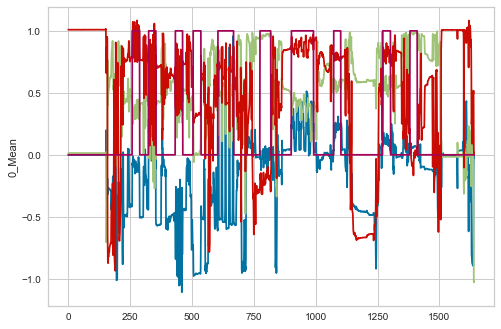

In [5]:
#plotting to see if the downsampled data appears correct
x_train.plot.line()

## Setup Data for Model Training

In [6]:
#setting up the data for classification
#x_train = feature dataframe, '3_Median' = 'class' after feature extraction therefore this is the target for classification
#consider fixing class imbalances here
setup(x_train, target="classMedian", remove_outliers = True, fix_imbalance=True, silent = True)

,Description,Value
0,session_id,2975
1,Target,3_Median
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1641, 13)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## Compare Models

In [11]:
#assessing the best machine learning models for the data with all relavent metrics
#best will take the best model for use
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9514,0.9888,0.8955,0.8908,0.8894,0.8584,0.8613,0.0650
rf,Random Forest Classifier,0.9459,0.9861,0.8998,0.8670,0.8791,0.8444,0.8479,0.0830
lightgbm,Light Gradient Boosting Machine,0.9431,0.9840,0.9040,0.8539,0.8745,0.8379,0.8416,0.0300
gbc,Gradient Boosting Classifier,0.9312,0.9700,0.9118,0.8079,0.8542,0.8096,0.8142,0.0970
knn,K Neighbors Classifier,0.9073,0.9705,0.9243,0.7306,0.8138,0.7535,0.7648,0.0100
dt,Decision Tree Classifier,0.8982,0.8520,0.7697,0.7698,0.7669,0.7020,0.7042,0.0060
ada,Ada Boost Classifier,0.8890,0.9429,0.8447,0.7084,0.7686,0.6965,0.7029,0.0370
qda,Quadratic Discriminant Analysis,0.8394,0.8464,0.5183,0.6686,0.5745,0.4803,0.4905,0.0050
lda,Linear Discriminant Analysis,0.7927,0.7140,0.4846,0.5320,0.5031,0.3734,0.3763,0.0050
dummy,Dummy Classifier,0.7817,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050


## Evaluate Model

In [12]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
predict_model(best);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9371,0.9825,0.8429,0.9291,0.8839,0.8409,0.8428


## Finalize Model 

In [14]:
final_best = finalize_model(best)

In [15]:
final_best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2975, verbose=0,
                     warm_start=False)

## Save Model

In [16]:
save_path = "FILEPATH" 
# ENTER NAME FOR THE FILE # Do not add a .csv or . anything # this will be automatically added
save_model(final_best, save_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       float_dtype='float32', id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='3_Median',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical='not_available',
                                 fill...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
      